In [2]:
import pandas as pd

# 创建一个示例 DataFrame
data = {'value': [1, 2, 3, 4, 5, 6, 7, 8, 9]}
df = pd.DataFrame(data)

# 计算指数移动平均值
alpha = 0.2  # 选择适当的衰减因子
ema_series = df['value'].ewm(alpha=alpha, adjust=False).mean()

# 将计算结果添加到 DataFrame
df['ema'] = ema_series

print(df)

   value       ema
0      1  1.000000
1      2  1.200000
2      3  1.560000
3      4  2.048000
4      5  2.638400
5      6  3.310720
6      7  4.048576
7      8  4.838861
8      9  5.671089


In [3]:
df['value'].ewm(alpha=0.5, adjust=False).mean()

0    1.000000
1    1.500000
2    2.250000
3    3.125000
4    4.062500
5    5.031250
6    6.015625
7    7.007812
8    8.003906
Name: value, dtype: float64

In [4]:
import numpy as np

In [5]:
import numpy as np

def exponential_moving_average(data, alpha):
    """
    计算指数移动平均

    Parameters:
    - data: 输入的时间序列数据
    - alpha: 平滑参数

    Returns:
    - ema: 指数移动平均值
    """
    # 计算权重
    weights = np.exp(np.linspace(-1.0, 0.0, len(data)) * alpha)

    # 归一化权重
    weights /= weights.sum()

    # 计算指数移动平均
    ema = np.convolve(data, weights, mode='full')[:len(data)]

    return ema

# 示例数据
data = np.random.rand(10)

# 平滑参数
alpha = 0.2

# 计算指数移动平均
ema_result = exponential_moving_average(data, alpha)

print("原始数据:", data)
print("指数移动平均:", ema_result)


原始数据: [0.46036675 0.55956411 0.09780906 0.4530736  0.52817325 0.65650188
 0.32862188 0.30851135 0.89914439 0.22653467]
指数移动平均: [0.04157097 0.09303358 0.10395626 0.14720466 0.19820638 0.26194218
 0.29750273 0.33204638 0.42070025 0.4506098 ]


In [26]:
data = np.random.rand(100)
alpha = 1
weights = np.exp(np.linspace(-1.0, 0.0, len(data)) * alpha)

In [27]:
weights

array([0.36787944, 0.37161423, 0.37538693, 0.37919793, 0.38304762,
       0.3869364 , 0.39086465, 0.39483279, 0.39884121, 0.40289032,
       0.40698054, 0.41111229, 0.41528598, 0.41950205, 0.42376092,
       0.42806302, 0.4324088 , 0.4367987 , 0.44123317, 0.44571265,
       0.45023762, 0.45480852, 0.45942582, 0.46409001, 0.46880154,
       0.4735609 , 0.47836859, 0.48322508, 0.48813088, 0.49308648,
       0.49809239, 0.50314912, 0.50825719, 0.51341712, 0.51862943,
       0.52389466, 0.52921334, 0.53458602, 0.54001324, 0.54549556,
       0.55103354, 0.55662774, 0.56227874, 0.5679871 , 0.57375342,
       0.57957828, 0.58546227, 0.591406  , 0.59741007, 0.6034751 ,
       0.60960169, 0.61579049, 0.62204212, 0.62835721, 0.63473642,
       0.64118039, 0.64768978, 0.65426525, 0.66090748, 0.66761715,
       0.67439493, 0.68124152, 0.68815762, 0.69514393, 0.70220117,
       0.70933005, 0.71653131, 0.72380568, 0.7311539 , 0.73857671,
       0.74607489, 0.75364919, 0.76130039, 0.76902926, 0.77683

In [21]:
weights /= weights.sum()

In [24]:
sum(weights *data)

0.4909865061538113

In [25]:
data

array([0.54516225, 0.58757377, 0.16689703, 0.08473319, 0.42053058,
       0.63664429, 0.40454678, 0.84483354, 0.24649012, 0.9788896 ,
       0.99741714, 0.95153771, 0.9601786 , 0.31543893, 0.98765129,
       0.1203366 , 0.54490358, 0.06825193, 0.12493285, 0.11120567,
       0.40724162, 0.79709918, 0.85528789, 0.75524042, 0.02606233,
       0.09896797, 0.44213764, 0.12543897, 0.86083516, 0.86656986,
       0.27207448, 0.55407942, 0.39348525, 0.39413138, 0.91409596,
       0.24633784, 0.16366618, 0.58739361, 0.69073226, 0.78685658,
       0.07475731, 0.93259014, 0.77560607, 0.49066853, 0.20231482,
       0.93086167, 0.24467877, 0.79519754, 0.8927658 , 0.27634549,
       0.5581298 , 0.15116508, 0.52299926, 0.95845592, 0.03664162,
       0.80157323, 0.09245393, 0.06177137, 0.0548177 , 0.13340793,
       0.39743549, 0.72816245, 0.53648671, 0.78441611, 0.12246482,
       0.9161796 , 0.29176094, 0.88354776, 0.30759946, 0.63267667,
       0.46119343, 0.10660144, 0.65187084, 0.69000862, 0.95970

In [1]:
from src.feature_engineering.autoregressive_features import *

/liubinxu/liubinxu/finance/learning/src/utils/data_utils.py:6: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [4]:
import glob

In [5]:
data_file = "/liubinxu/liubinxu/finance/learning/data/*.qfq.kdj.parquet"
data_files =glob.glob(data_file)

In [6]:
data_files

['/liubinxu/liubinxu/finance/learning/data/159605.qfq.kdj.parquet',
 '/liubinxu/liubinxu/finance/learning/data/516780.qfq.kdj.parquet',
 '/liubinxu/liubinxu/finance/learning/data/561550.qfq.kdj.parquet',
 '/liubinxu/liubinxu/finance/learning/data/159766.qfq.kdj.parquet',
 '/liubinxu/liubinxu/finance/learning/data/159865.qfq.kdj.parquet',
 '/liubinxu/liubinxu/finance/learning/data/159949.qfq.kdj.parquet',
 '/liubinxu/liubinxu/finance/learning/data/159611.qfq.kdj.parquet',
 '/liubinxu/liubinxu/finance/learning/data/515700.qfq.kdj.parquet',
 '/liubinxu/liubinxu/finance/learning/data/512690.qfq.kdj.parquet',
 '/liubinxu/liubinxu/finance/learning/data/000016.qfq.kdj.parquet',
 '/liubinxu/liubinxu/finance/learning/data/510330.qfq.kdj.parquet',
 '/liubinxu/liubinxu/finance/learning/data/159928.qfq.kdj.parquet',
 '/liubinxu/liubinxu/finance/learning/data/515790.qfq.kdj.parquet',
 '/liubinxu/liubinxu/finance/learning/data/515030.qfq.kdj.parquet',
 '/liubinxu/liubinxu/finance/learning/data/51522

In [7]:
data = pd.read_parquet(data_files[0])

In [8]:
data

,open,close,high,low,vol,amount,datetime,code,date,date_stamp,...,close_rolling_96_mean_amount_normalize60_rolling_96_mean_corr_roll480,close_rolling_480_mean_amount_normalize60_rolling_480_mean_corr_roll24,close_rolling_480_mean_amount_normalize60_rolling_480_mean_corr_roll96,close_rolling_480_mean_amount_normalize60_rolling_480_mean_corr_roll480,K,D,J,target_close1,target_close2,target_close5
index,,,,,,,,,,,,,,,,,,,,,
2021-12-02 09:40:00,0.963,0.964,0.964,0.960,33720600.0,32440008.00,2021-12-02 09:40:00,159605,2021-12-02,1.638374e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003112,-0.049793,0.002075
2021-12-02 09:45:00,0.964,0.967,0.967,0.963,26020000.0,25122128.00,2021-12-02 09:45:00,159605,2021-12-02,1.638374e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.003102,-0.047570,-0.002068
2021-12-02 09:50:00,0.966,0.969,0.970,0.966,24231500.0,23451248.00,2021-12-02 09:50:00,159605,2021-12-02,1.638374e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.007224,-0.048504,-0.006192
2021-12-02 09:55:00,0.969,0.971,0.971,0.968,13183000.0,12789008.00,2021-12-02 09:55:00,159605,2021-12-02,1.638374e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.008239,-0.051493,-0.006179
2021-12-02 10:00:00,0.971,0.970,0.971,0.969,9988200.0,9687072.00,2021-12-02 10:00:00,159605,2021-12-02,1.638374e+09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.006186,-0.047423,-0.005155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-12 14:40:00,0.725,0.724,0.726,0.724,11460400.0,8307953.00,2023-05-12 14:40:00,159605,2023-05-12,1.683821e+09,...,0.455227,-0.982917,0.929627,0.971821,35.721710,31.811955,43.541219,NaN,NaN,NaN
2023-05-12 14:45:00,0.725,0.725,0.725,0.724,4188500.0,3033177.75,2023-05-12 14:45:00,159605,2023-05-12,1.683821e+09,...,0.453218,-0.982594,0.923866,0.971751,42.268091,33.554644,59.694985,NaN,NaN,NaN
2023-05-12 14:50:00,0.724,0.724,0.725,0.724,4501500.0,3261044.75,2023-05-12 14:50:00,159605,2023-05-12,1.683821e+09,...,0.451418,-0.982194,0.917739,0.971699,43.556743,35.221661,60.226907,NaN,NaN,NaN


In [9]:
data, features = add_rolling_features(data, rolls=[24, 96], column="amount_normalize60", agg_funcs=["mean", "std", "std_mean", "exp_mean"])

/liubinxu/liubinxu/finance/learning/src/feature_engineering/autoregressive_features.py:182: UserWarning: Assuming just one unique time series in dataset. If there are multiple, provide `ts_id` argument
  warnings.warn(


In [10]:
features

['amount_normalize60_rolling_24_mean',
 'amount_normalize60_rolling_24_std',
 'amount_normalize60_rolling_24_std_mean',
 'amount_normalize60_rolling_24_exp_mean',
 'amount_normalize60_rolling_96_mean',
 'amount_normalize60_rolling_96_std',
 'amount_normalize60_rolling_96_std_mean',
 'amount_normalize60_rolling_96_exp_mean']

(array([-480.,    0.,  480.,  960.]),
 [Text(-480.0, 0, ''),
  Text(0.0, 0, '2022-05-12 10:20:00'),
  Text(480.0, 0, '2022-05-26 10:20:00'),
  Text(960.0, 0, '')])

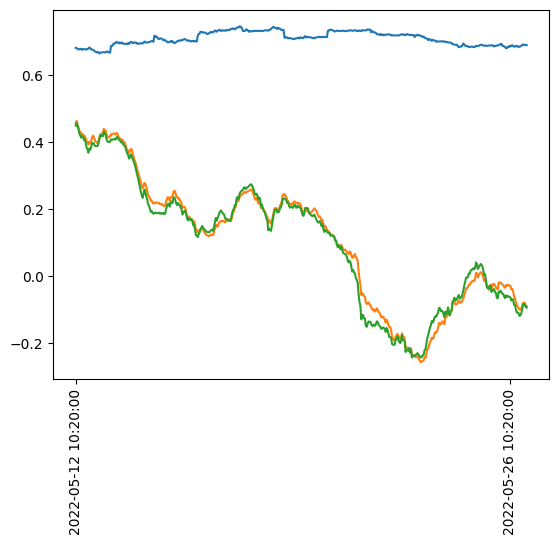

In [18]:
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
fig, ax1 = plt.subplots(1,1, sharex=True)
datac = data[5000:5500]
ax1.plot(datac["datetime"], datac["close"], label=2)
# ax.plot(datac["datetime"], datac["close"].rolling(24, min_periods=1).mean(), label=2)
ax1.plot(datac["datetime"], datac["amount_normalize60_rolling_96_mean"], label=2)
ax1.plot(datac["datetime"], datac["amount_normalize60_rolling_96_exp_mean"], label=2)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(base=480))
plt.xticks(rotation=90)

In [35]:
import pandas as pd
import numpy as np
import os

In [25]:
data_file = "/data/finance/*.qfq.parquet"

In [26]:
data_files =glob.glob(data_file)

In [27]:
data = pd.read_parquet(data_files[0])

In [24]:
data_files

[]

In [33]:
data[-48:]["amount"].sum()

36466844.814453125

In [42]:
code = []
lens = []
amount = []
for data_file in data_files:
    data = pd.read_parquet(data_file)
    code.append(os.path.basename(data_file).split(".")[0])
    lens.append(len(data))
    amount.append(data[-48:]["amount"].sum())

In [43]:
a= pd.DataFrame()

In [44]:
a["code"] = code
a["lens"] = lens
a["amount"] = amount

In [47]:
choose1 =  a[a["lens"] >  10000]

In [52]:
choose2 = choose1[choose1["amount"]> 20000000]

In [55]:
choose2 = choose2.reset_index()

In [59]:
print(list(choose2["code"][0::2]))

['159905', '159003', '159601', '159606', '159610', '159612', '159619', '159628', '159632', '159636', '159677', '159741', '159814', '159881', '159647', '159650', '159667', '159679', '159681', '159688', '159708', '159718', '159736', '159742', '159747', '159755', '159776', '159781', '159790', '159796', '159805', '159813', '159820', '159828', '159831', '159839', '159841', '159843', '159850', '159852', '159864', '159866', '159869', '159875', '159887', '159892', '159902', '159907', '159915', '159920', '159925', '159930', '159937', '159939', '159941', '159949', '159968', '159972', '159980', '159982', '159992', '159994', '159997', '510050', '510150', '510230', '510310', '510350', '510500', '510580', '510710', '510800', '510900', '511020', '511060', '511220', '511270', '511380', '511620', '511690', '511810', '511880', '511990', '512010', '512070', '512120', '512290', '512400', '512500', '512660', '512680', '512700', '512720', '512810', '512880', '512900', '512950', '513000', '513020', '513060',

In [60]:
print(list(choose2["code"][1::2]))

['159001', '159005', '159605', '159607', '159611', '159615', '159625', '159629', '159633', '159637', '159719', '159768', '159859', '159638', '159649', '159655', '159671', '159680', '159682', '159707', '159713', '159732', '159740', '159745', '159750', '159766', '159780', '159783', '159792', '159801', '159806', '159819', '159825', '159830', '159837', '159840', '159842', '159845', '159851', '159857', '159865', '159867', '159870', '159883', '159888', '159901', '159903', '159908', '159919', '159922', '159928', '159934', '159938', '159940', '159943', '159967', '159971', '159977', '159981', '159985', '159993', '159995', '159998', '510100', '510180', '510300', '510330', '510360', '510510', '510680', '510760', '510880', '511010', '511030', '511180', '511260', '511360', '511520', '511660', '511700', '511850', '511900', '512000', '512040', '512100', '512170', '512330', '512480', '512510', '512670', '512690', '512710', '512760', '512820', '512890', '512930', '512980', '513010', '513050', '513070',